In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-sales-2025/amazon_sales_data 2025.csv


In [2]:
df = pd.read_csv("/kaggle/input/amazon-sales-2025/amazon_sales_data 2025.csv")
df.head()

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [4]:
df.isnull().sum()

Order ID             0
Date                 0
Product              0
Category             0
Price                0
Quantity             0
Total Sales          0
Customer Name        0
Customer Location    0
Payment Method       0
Status               0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Price,Quantity,Total Sales
count,250.000000,250.000000,250.000000
mean,343.580000,2.856000,975.380000
std,380.635808,1.429489,1252.112254
min,15.000000,1.000000,15.000000
25%,40.000000,2.000000,100.000000
50%,150.000000,3.000000,400.000000
75%,600.000000,4.000000,1500.000000
max,1200.000000,5.000000,6000.000000


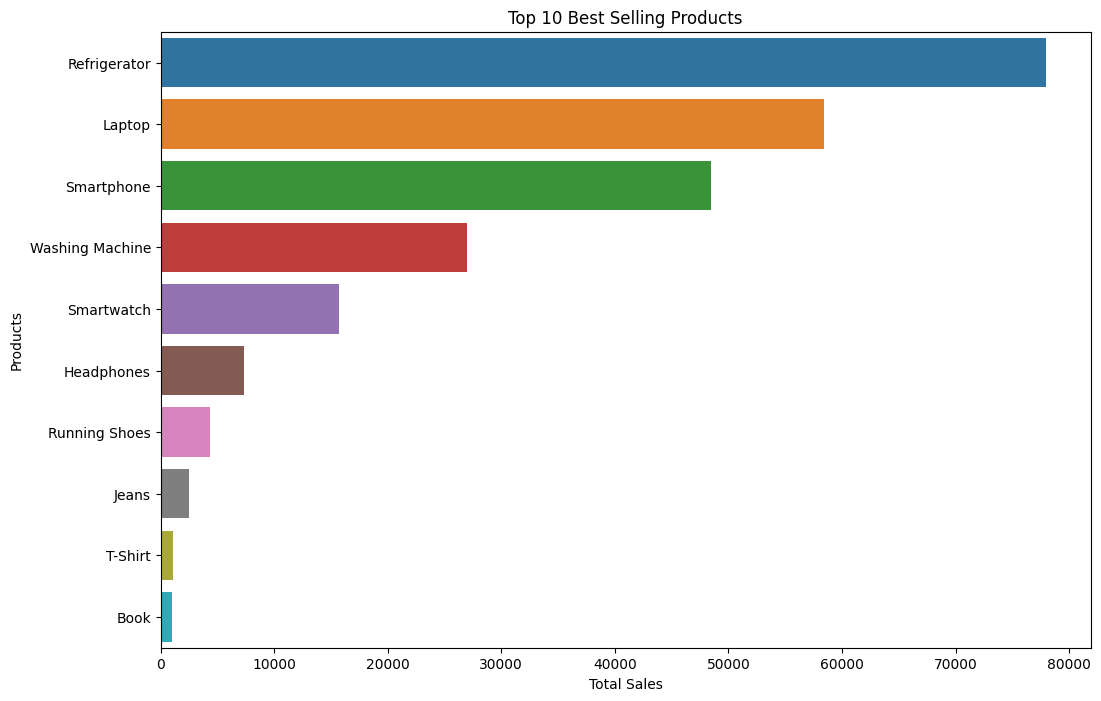

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

top_products = df.groupby("Product")["Total Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Best Selling Products")
plt.xlabel("Total Sales")
plt.ylabel("Products")
plt.show()

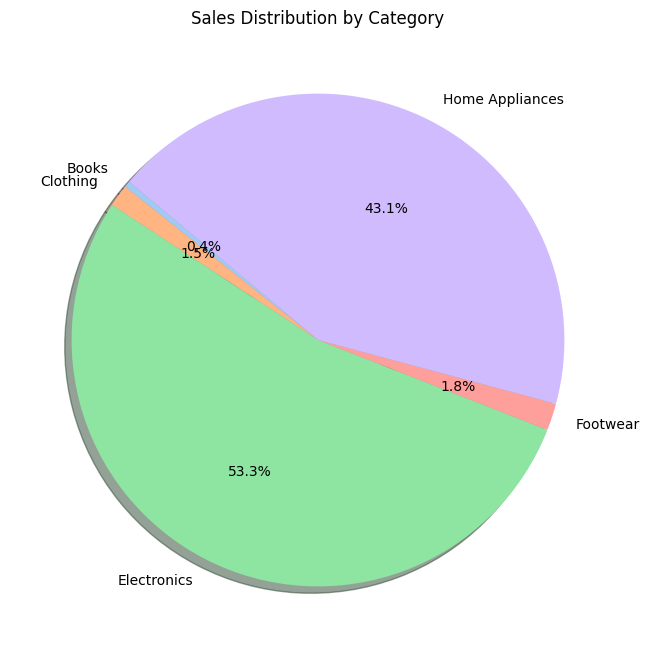

In [8]:
category_sales = df.groupby("Category")["Total Sales"].sum()
plt.figure(figsize=(12,8))
category_sales.plot(kind="pie", autopct="%1.1f%%", startangle=140, shadow=True, colors=sns.color_palette("pastel"))
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.show()


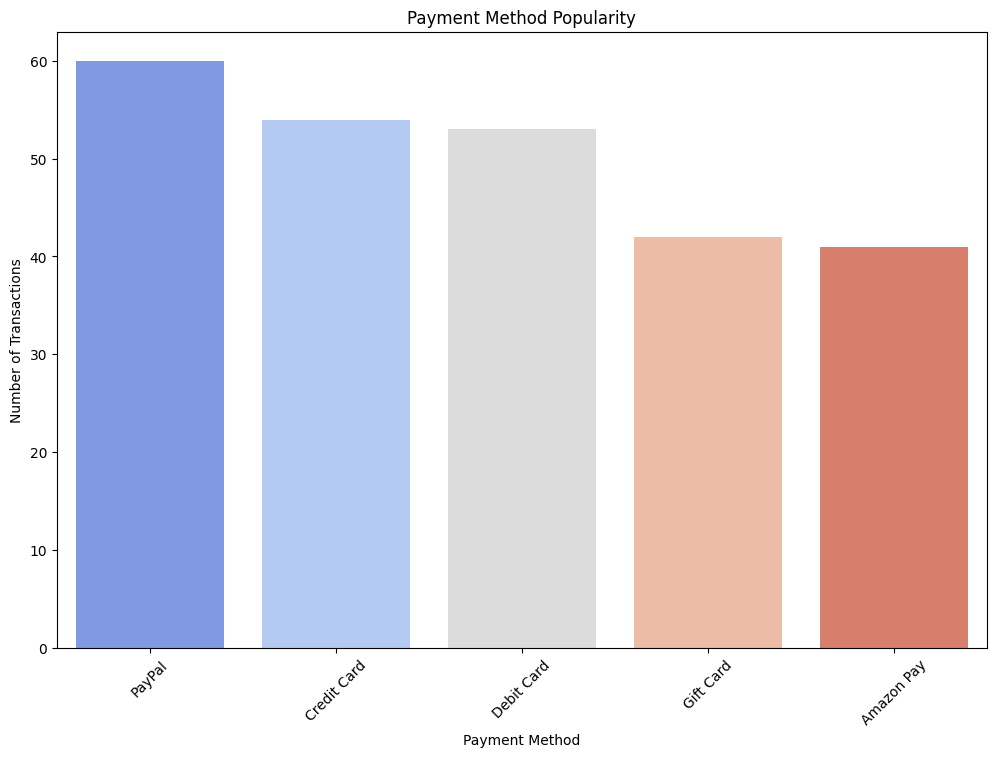

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x="Payment Method", order=df['Payment Method'].value_counts().index, palette='coolwarm')
plt.title("Payment Method Popularity")
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

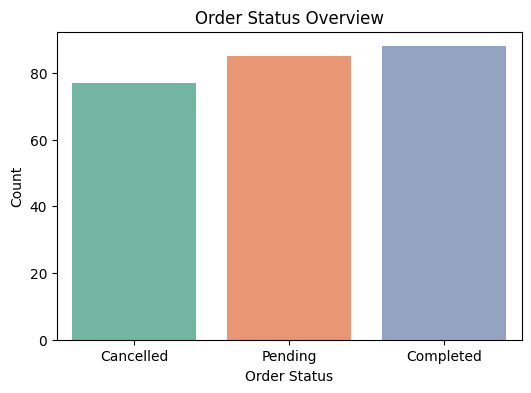

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Status", palette="Set2")
plt.title("Order Status Overview")
plt.xlabel("Order Status")
plt.ylabel("Count")
plt.show()


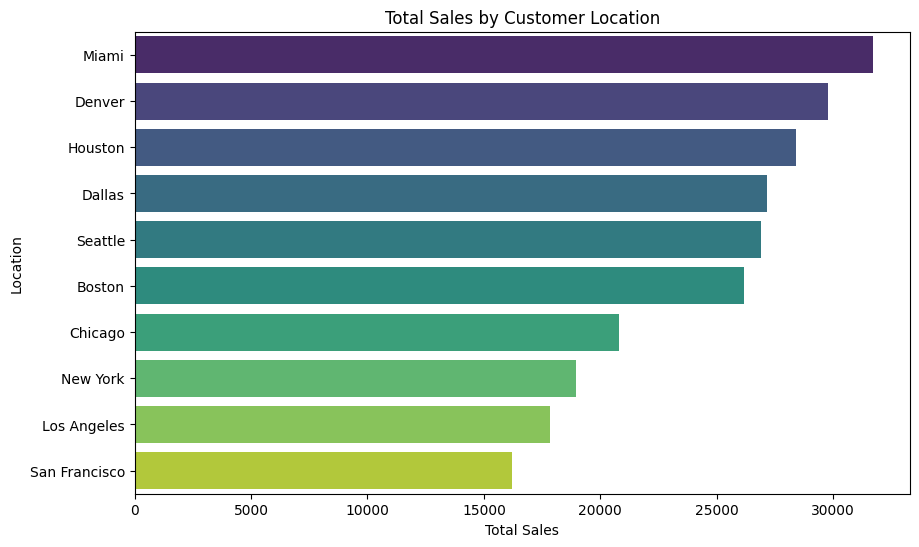

In [11]:
plt.figure(figsize=(10,6))
location_sales = df.groupby("Customer Location")["Total Sales"].sum().sort_values(ascending=False)
sns.barplot(x=location_sales.values, y=location_sales.index, palette="viridis")
plt.title("Total Sales by Customer Location")
plt.xlabel("Total Sales")
plt.ylabel("Location")
plt.show()


In [12]:

ml_df = df[["Price", "Quantity", "Total Sales", "Category", "Payment Method", "Customer Location", "Status"]]


from sklearn.preprocessing import LabelEncoder

le_category = LabelEncoder()
le_payment = LabelEncoder()
le_location = LabelEncoder()
le_status = LabelEncoder()

ml_df["Category"] = le_category.fit_transform(ml_df["Category"])
ml_df["Payment Method"] = le_payment.fit_transform(ml_df["Payment Method"])
ml_df["Customer Location"] = le_location.fit_transform(ml_df["Customer Location"])
ml_df["Status"] = le_status.fit_transform(ml_df["Status"])


/tmp/ipykernel_13/3428388162.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df["Category"] = le_category.fit_transform(ml_df["Category"])
/tmp/ipykernel_13/3428388162.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df["Payment Method"] = le_payment.fit_transform(ml_df["Payment Method"])
/tmp/ipykernel_13/3428388162.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [13]:
ml_df.head()

,Price,Quantity,Total Sales,Category,Payment Method,Customer Location,Status
0,60,3,180,3,2,7,0
1,100,4,400,2,2,8,2
2,60,2,120,3,0,3,0
3,60,3,180,3,1,2,2
4,150,3,450,2,2,7,2


In [14]:
from sklearn.model_selection import train_test_split

X = ml_df.drop("Status", axis=1)
y = ml_df['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy:  0.26
Classification report:
              precision    recall  f1-score   support

           0       0.29      0.38      0.32        16
           1       0.13      0.12      0.12        17
           2       0.36      0.29      0.32        17

    accuracy                           0.26        50
   macro avg       0.26      0.26      0.26        50
weighted avg       0.26      0.26      0.26        50



In [17]:
# Create a new feature: Price Per Unit
df["Price Per Unit"] = df["Total Sales"] / df["Quantity"]

# Encode again with the new feature
ml_df = df[["Price", "Quantity", "Total Sales", "Price Per Unit", "Category", "Payment Method", "Customer Location", "Status"]]

from sklearn.preprocessing import LabelEncoder

le_category = LabelEncoder()
le_payment = LabelEncoder()
le_location = LabelEncoder()
le_status = LabelEncoder()

ml_df["Category"] = le_category.fit_transform(ml_df["Category"])
ml_df["Payment Method"] = le_payment.fit_transform(ml_df["Payment Method"])
ml_df["Customer Location"] = le_location.fit_transform(ml_df["Customer Location"])
ml_df["Status"] = le_status.fit_transform(ml_df["Status"])


/tmp/ipykernel_13/62254960.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df["Category"] = le_category.fit_transform(ml_df["Category"])
/tmp/ipykernel_13/62254960.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df["Payment Method"] = le_payment.fit_transform(ml_df["Payment Method"])
/tmp/ipykernel_13/62254960.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = ml_df.drop("Status", axis=1)
y = ml_df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.28
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.44      0.39        16
           1       0.13      0.12      0.12        17
           2       0.33      0.29      0.31        17

    accuracy                           0.28        50
   macro avg       0.27      0.28      0.28        50
weighted avg       0.27      0.28      0.27        50



In [19]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.34
              precision    recall  f1-score   support

           0       0.50      0.31      0.38        16
           1       0.25      0.35      0.29        17
           2       0.38      0.35      0.36        17

    accuracy                           0.34        50
   macro avg       0.38      0.34      0.35        50
weighted avg       0.37      0.34      0.35        50



In [20]:
# Step 1: Create the binary target
df["High Spender"] = df["Total Sales"].apply(lambda x: 1 if x > 1000 else 0)

# Let's see the distribution
df["High Spender"].value_counts()


High Spender
0    176
1     74
Name: count, dtype: int64

In [21]:
# Create a new feature: Price Per Unit
df["Price Per Unit"] = df["Total Sales"] / df["Quantity"]

# Select features
features = ["Price", "Quantity", "Total Sales", "Price Per Unit", "Category", "Payment Method", "Customer Location"]
target = "High Spender"

ml_df = df[features + [target]]


In [22]:
from sklearn.preprocessing import LabelEncoder

le_cat = LabelEncoder()
le_pay = LabelEncoder()
le_loc = LabelEncoder()

ml_df["Category"] = le_cat.fit_transform(ml_df["Category"])
ml_df["Payment Method"] = le_pay.fit_transform(ml_df["Payment Method"])
ml_df["Customer Location"] = le_loc.fit_transform(ml_df["Customer Location"])


/tmp/ipykernel_13/3671505921.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df["Category"] = le_cat.fit_transform(ml_df["Category"])
/tmp/ipykernel_13/3671505921.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml_df["Payment Method"] = le_pay.fit_transform(ml_df["Payment Method"])
/tmp/ipykernel_13/3671505921.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [23]:
from sklearn.model_selection import train_test_split

X = ml_df.drop(target, axis=1)
y = ml_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, classification_report

y_pred1 = model1.predict(X_test)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred1))
print("📋 Classification Report:")
print(classification_report(y_test, y_pred1))


🎯 Accuracy: 1.0
📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



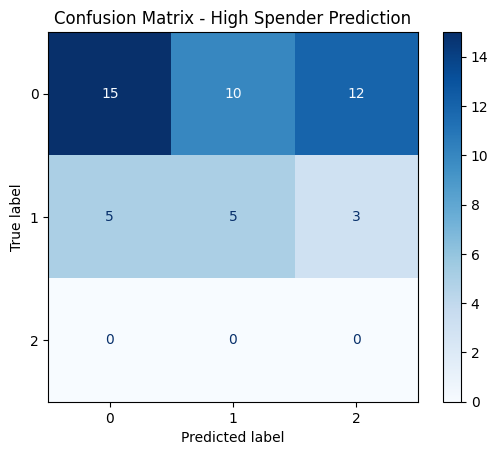

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - High Spender Prediction")
plt.show()


In [27]:

df.to_csv("/kaggle/working/amazon_sales_processed.csv", index=False)
